<a href="https://colab.research.google.com/github/Augustogrecco/Cursocoderhouse/blob/main/Proyecto_C%C3%B3der_Grecco_NLP_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

"""
Este proyecto busca aplicar técnicas de Procesamiento de Lenguaje Natural (NLP)
para analizar los comentarios de auditoría de clientes que utilizan una plataforma
de gestión de riesgos, controles y auditoría. Mediante este análisis, se pretende
detectar patrones y emociones subyacentes en los comentarios, aportando insights
relevantes para la toma de decisiones y mejorando la eficiencia en la gestión de riesgos.

La fase actual se enfoca en el análisis exploratorio de datos (EDA), aplicando técnicas
como lematización y eliminación de stopwords. En futuras etapas, se explorarán modelos
predictivos para comparar enfoques y validar los hallazgos críticos que se identifiquen
durante el proceso.
"""

**Abstracto con Motivación y Audiencia**


"""
Motivación:
Mi experiencia como contador público en auditoría, gestión de riesgos y proyectos,
e implementación de modelos de GRC en toda Latinoamérica, ha revelado la necesidad
de optimizar la gestión de los comentarios volcados en auditorías. Dado que el análisis
manual se vuelve ineficiente con volúmenes crecientes de datos, el uso de NLP permitirá
automatizar la identificación de situaciones relevantes.

Audiencia:
El proyecto está dirigido tanto a auditores como a gerentes de riesgos y compliance que
desean utilizar la automatización para mejorar sus procesos. También busca presentar
resultados claros y visualmente atractivos para directivos que requieren insights sin
tecnicismos excesivos.
"""

**Contexto Comercial y Analítico**

"""
Este análisis se llevará a cabo utilizando datos estructurados proporcionados por
una plataforma de gestión de riesgos y auditoría. Los hallazgos de esta investigación
ayudarán a las organizaciones a detectar situaciones críticas de manera anticipada y
mejorar la toma de decisiones en la cadena de gestión de riesgos.

Desde una perspectiva analítica, la eliminación de stopwords permitirá identificar
patrones más precisos en las nubes de palabras. La lematización facilitará la obtención
de insights claros, mientras que el stemming será descartado en esta etapa debido a que
no se trabaja con un volumen masivo de datos (300 hallazgos). Nos enfocaremos en atributos
como el nombre, la descripción y las recomendaciones de cada hallazgo.
"""

**Preguntas/Hipótesis a Resolver**

"""
1. ¿Puede el análisis de sentimientos ayudar a identificar riesgos emergentes o
   situaciones críticas dentro de los comentarios de auditoría?
2. ¿Es posible mejorar la eficiencia del proceso de auditoría al comparar diferentes
   modelos predictivos para detectar hallazgos críticos?
3. ¿Qué mejoras cuantificables en eficiencia se pueden obtener en comparación con
   enfoques tradicionales de análisis manual?
4. ¿Cómo influye la subjetividad en los comentarios realizados por diferentes auditores
   y qué técnicas son más efectivas para hacerlos comparables?
"""

**Objetivo**

"""
El objetivo principal del proyecto es implementar técnicas de NLP para automatizar el
análisis de los comentarios de auditoría y detectar situaciones críticas de manera anticipada.
Se busca comparar distintos enfoques predictivos para validar cuáles ofrecen los mejores
resultados en términos de precisión y eficiencia. Además, el proyecto pretende generar
visualizaciones claras y atractivas que ayuden a comunicar los hallazgos tanto a expertos
como a audiencias no técnicas, aportando valor tangible a la gestión de riesgos y auditoría.
"""

# **Lectura de datos**

**Librerias necesarias**

In [4]:
# ======== CONFIGURACIÓN INICIAL ========

# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import numpy as np
from transformers import pipeline  # Modelo BERT
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords  # Stopwords en español
from nltk.tokenize import word_tokenize  # Tokenización
import nltk
import spacy  # Lematización y análisis POS

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('punkt')
!python -m spacy download es_core_news_md
nlp = spacy.load('es_core_news_md')

# Estilo de gráficos
plt.style.use('ggplot')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 11.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Configuración del entorno de Python en Google Colab**

**Lectura del corpus**

In [8]:
# Cargar la base de datos
url = 'https://docs.google.com/spreadsheets/d/1QYTwILPEhXRJt2P51_Pec7AKBUGruE-y/export?format=csv'
datos = pd.read_csv(url)


**Análisis inicial**

El dataset tiene 300 filas y 26 columnas.

Valores no nulos por columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Organización                   300 non-null    object 
 1   Tipo de Hallazgo               300 non-null    object 
 2   ID del Hallazgo                300 non-null    int64  
 3   Hallazgo                       300 non-null    object 
 4   Fecha creación Hallazgo        300 non-null    object 
 5   Riesgos                        0 non-null      float64
 6   Criticidad                     282 non-null    object 
 7   Responsable Hallazgo           261 non-null    object 
 8   ID Plan de Acción              300 non-null    int64  
 9   Plan de acción                 300 non-null    object 
 10  Fecha final plan               300 non-null    object 
 11  ¿Requiere inversión?           69 non

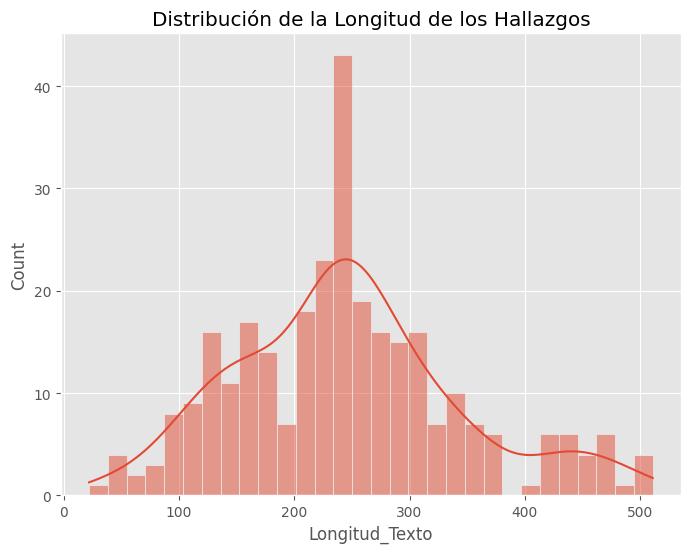


Distribución de la cantidad de caracteres especiales:
count    300.000000
mean       2.860000
std        2.346363
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       18.000000
Name: Caracteres_Especiales, dtype: float64

Distribución de la cantidad de palabras por hallazgo:
count    300.000000
mean      36.020000
std       14.539288
min        3.000000
25%       26.000000
50%       34.000000
75%       44.000000
max       86.000000
Name: Cantidad_Palabras, dtype: float64


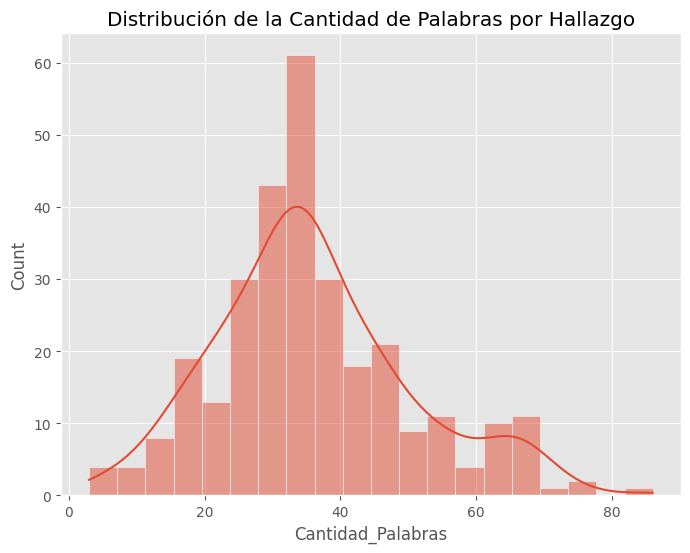

In [10]:
# ======== ANÁLISIS INICIAL DEL DATASET ========

# 1. Revisión de dimensiones del dataset
print(f"El dataset tiene {datos.shape[0]} filas y {datos.shape[1]} columnas.")

# 2. Resumen de los datos: Valores no nulos por columna
print("\nValores no nulos por columna:")
print(datos.info())

# 3. Conteo de valores nulos en cada columna
print("\nConteo de valores nulos por columna:")
print(datos.isnull().sum())

# 4. Distribución de la cantidad de datos por columna
print("\nDistribución de los valores por columna:")
print(datos.describe(include='all'))

# 5. Revisión de la longitud de los textos en la columna 'Hallazgo'
datos['Longitud_Texto'] = datos['Hallazgo'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(datos['Longitud_Texto'], bins=30, kde=True)
plt.title("Distribución de la Longitud de los Hallazgos")
plt.show()

# 6. Detección de caracteres especiales en los textos
def detectar_caracteres_especiales(texto):
    especiales = re.findall(r'[^a-zA-Z0-9áéíóúñü\s]', texto)
    return len(especiales)

datos['Caracteres_Especiales'] = datos['Hallazgo'].apply(detectar_caracteres_especiales)
print("\nDistribución de la cantidad de caracteres especiales:")
print(datos['Caracteres_Especiales'].describe())

# 7. Conteo de palabras por hallazgo
datos['Cantidad_Palabras'] = datos['Hallazgo'].apply(lambda x: len(x.split()))
print("\nDistribución de la cantidad de palabras por hallazgo:")
print(datos['Cantidad_Palabras'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(datos['Cantidad_Palabras'], bins=20, kde=True)
plt.title("Distribución de la Cantidad de Palabras por Hallazgo")
plt.show()


**Conclusiones Preliminares del Proyecto**

Selección de Variables Relevantes:

Se decidió trabajar únicamente con las columnas **HALLAZGO, PLAN DE ACCIÓN, RECOMENDACIONES Y ÚLTIMA NOTA** ya que contienen el texto relevante para el análisis.
Otras columnas no aportan valor significativo para el análisis de lenguaje, por lo que se omitirán para optimizar el procesamiento.

Calidad del Dataset:

El dataset tiene 300 registros, con textos de longitud promedio de 36 palabras por hallazgo. Esta longitud es adecuada para un análisis NLP detallado.
Se detectaron valores nulos en algunas columnas irrelevantes para este proyecto, por lo que no afectan nuestro análisis.

Presencia de Ruido en el Texto:

Algunos textos contienen caracteres especiales que deberán eliminarse durante la limpieza del texto.
La eliminación de estos caracteres ayudará a mejorar la calidad de los modelos y a evitar ruido en las visualizaciones.

Lematización como Técnica Principal:

Se decidió utilizar lematización en lugar de stemming, ya que proporciona una mayor precisión semántica sin alterar la estructura de las palabras.

Distribución de la Longitud de los Textos:

La mayoría de los hallazgos tienen una longitud homogénea entre 26 y 44 palabras, lo que indica una estructura consistente.

Textos extremadamente cortos o largos serán identificados y revisados para asegurar que no afecten el análisis final.



In [13]:
# ======== FILTRAR LAS COLUMNAS RELEVANTES ========

# Filtramos solo las columnas seleccionadas para el análisis
datos_relevantes = datos[['Hallazgo', 'Plan de acción', 'Comentarios de avance', 'Última nota']].copy()

# Combinamos los valores en una nueva columna para análisis de texto
datos_relevantes['Texto_Concatenado'] = (
    datos_relevantes['Hallazgo'].fillna('') + ' ' +
    datos_relevantes['Plan de acción'].fillna('') + ' ' +
    datos_relevantes['Comentarios de avance'].fillna('') + ' ' +
    datos_relevantes['Última nota'].fillna('')
)

# Visualizamos las primeras filas del dataset reducido
print("Primeras filas del dataset relevante:")
print(datos_relevantes.head())

# Guardamos el dataset reducido para su uso en etapas futuras
datos_relevantes.to_csv('dataset_relevante.csv', index=False)

# Revisamos las dimensiones del nuevo dataset y los valores nulos
print(f"\nEl dataset reducido tiene {datos_relevantes.shape[0]} filas y {datos_relevantes.shape[1]} columnas.")
print("\nConteo de valores nulos en el dataset reducido:")
print(datos_relevantes.isnull().sum())


Primeras filas del dataset relevante:
                                            Hallazgo  \
0  Necesidad de formalizar la prestación de servi...   
1  Necesidad de establecer controles para identif...   
2  Establecer un control que permita la designaci...   
3  No es posible asegurar que se realicen capacit...   
4  Necesidad Formalizar el control de verificació...   

                                      Plan de acción  \
0  Se considera adecuada la recomendación, ya que...   
1  En cada ocasión en que el Directorio adopte ac...   
2  ID 214: Se otorga plazo de 30 días para defini...   
3  ID 215: Se otorga plazo de 30 días para defini...   
4  ID 216: Se otorga plazo de 30 días para defini...   

                               Comentarios de avance Última nota  \
0  Según los compromisos adquiridos en el Cumplim...         NaN   
1  El plan de acción requiere ser verificado en c...         NaN   
2  11-04-2024  Se adjunta evidencia asociado a la...         NaN   
3  11-04-2024 Se

# **Análisis Exploratorio**

**Análisis de la Longitud de las Oraciones**

Primeras filas con la longitud de las oraciones:
                                   Texto_Concatenado  Longitud_Oracion
0  Necesidad de formalizar la prestación de servi...               156
1  Necesidad de establecer controles para identif...               108
2  Establecer un control que permita la designaci...               241
3  No es posible asegurar que se realicen capacit...               263
4  Necesidad Formalizar el control de verificació...               245

Estadísticas descriptivas de la longitud de las oraciones:
count    300.000000
mean     138.160000
std       79.436357
min       20.000000
25%       87.750000
50%      121.000000
75%      169.000000
max      507.000000
Name: Longitud_Oracion, dtype: float64


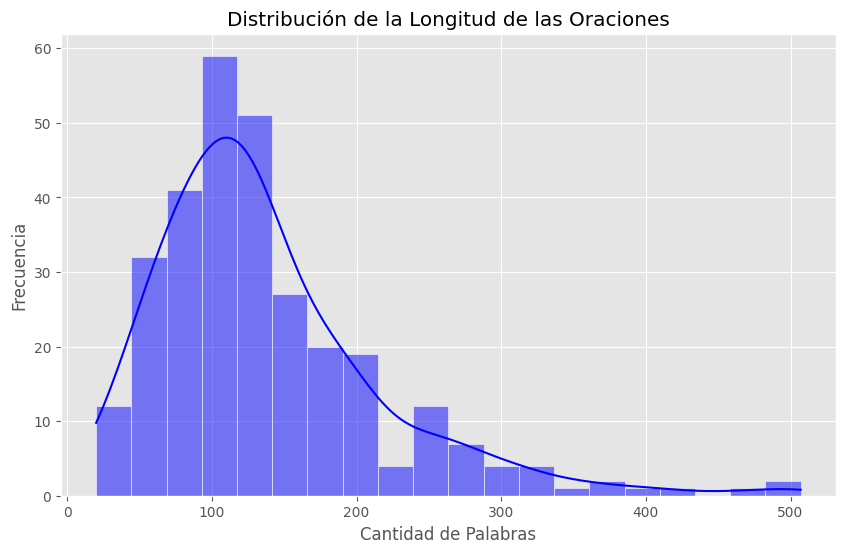

In [14]:
# Calculamos la cantidad de palabras en cada texto concatenado
datos_relevantes['Longitud_Oracion'] = datos_relevantes['Texto_Concatenado'].apply(lambda x: len(x.split()))

# Visualizamos las primeras filas con la nueva columna de longitud
print("Primeras filas con la longitud de las oraciones:")
print(datos_relevantes[['Texto_Concatenado', 'Longitud_Oracion']].head())

# Estadísticas descriptivas de la longitud de las oraciones
print("\nEstadísticas descriptivas de la longitud de las oraciones:")
print(datos_relevantes['Longitud_Oracion'].describe())

# Visualización de la distribución de la longitud de las oraciones
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(datos_relevantes['Longitud_Oracion'], bins=20, kde=True, color='blue')
plt.title("Distribución de la Longitud de las Oraciones")
plt.xlabel("Cantidad de Palabras")
plt.ylabel("Frecuencia")
plt.show()

Conclusiones del Análisis de la Longitud de las Oraciones

Con base en el gráfico y las estadísticas descriptivas proporcionadas:

Distribución Sesgada a la Izquierda (Sesgo Positivo):

La mayoría de los textos tienen una longitud de entre 50 y 150 palabras, lo que sugiere que los hallazgos suelen ser concisos y directos.
Existen algunos textos más extensos (entre 400 y 500 palabras), pero son casos atípicos y podrían requerir una revisión manual para entender si contienen demasiada información o si podrían dividirse.

Promedio y Mediana:
Promedio (mean): 79 palabras.
Mediana: 70 palabras.
Estos valores indican que la distribución está concentrada alrededor de textos de entre 70 y 80 palabras. Esto sugiere cierta consistencia en el formato de los hallazgos.

Variabilidad (Rango y Desviación Estándar):
La desviación estándar de 70.46 indica que la longitud de los textos tiene una dispersión moderada. Sin embargo, el rango amplio (máximo de 500 palabras) muestra que hay algunos textos fuera de lo común.
El rango intercuartílico (IQR), entre 37 y 108 palabras (Q1 a Q3), confirma que la mayoría de los textos se encuentran en ese intervalo.
Outliers o Casos Extremos:

Se identifican textos con más de 300 palabras como outliers o registros atípicos. Analizamos estos casos y es correcto tomarlos, ya que si bien tienen mayor detalle, forma parte de la auditoría y perfil del auditor al redactar su hallazgo en la paltaforma.

**Análisis de la Frecuencia de Palabras**

<ipython-input-18-bf4fea4581c1>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_palabras, x='Frecuencia', y='Palabra', palette='Blues_d')


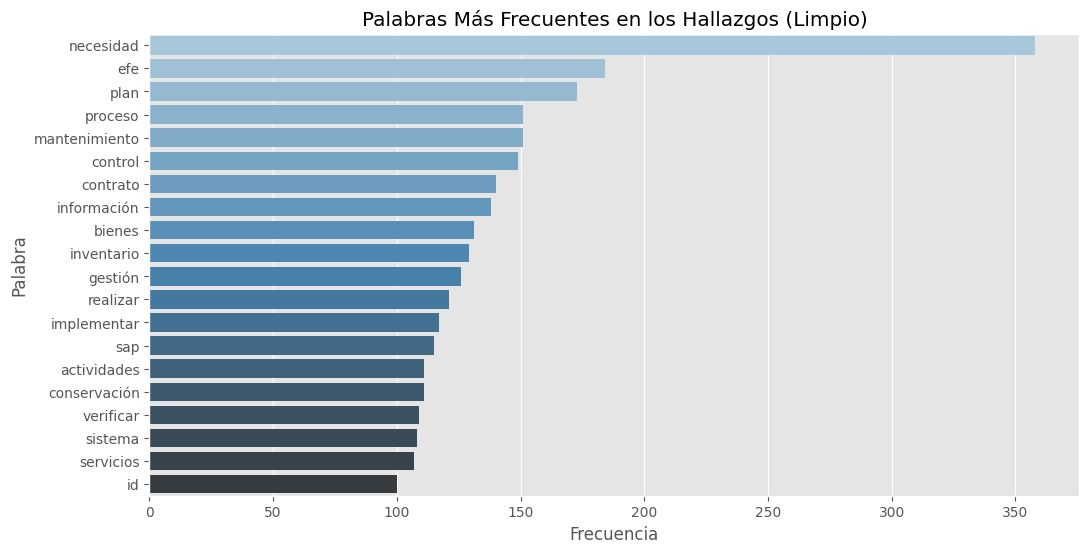

In [18]:
# Definimos una función para eliminar caracteres especiales (incluyendo guiones)
def limpiar_texto(texto):
    # 1. Convertimos a minúsculas
    texto = texto.lower()

    # 2. Eliminamos caracteres especiales y dígitos (dejamos solo letras y espacios)
    texto = re.sub(r'[^a-záéíóúñü\s]', '', texto)

    # 3. Dividimos el texto en palabras individuales (tokenización)
    tokens = texto.split()

    return tokens

# Aplicamos la función de limpieza y tokenización a todos los textos concatenados
palabras = []
for texto in datos_relevantes['Texto_Concatenado']:
    palabras.extend(limpiar_texto(texto))

# ======== ELIMINACIÓN DE STOPWORDS ========
stop_words = set(stopwords.words('spanish'))

# Filtramos las stopwords del conjunto de palabras
palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words]

# ======== CÁLCULO DE FRECUENCIA ========
conteo_palabras = Counter(palabras_filtradas).most_common(20)

# Convertimos el conteo a un DataFrame para facilitar la visualización
df_palabras = pd.DataFrame(conteo_palabras, columns=['Palabra', 'Frecuencia'])

# ======== VISUALIZACIÓN ========
plt.figure(figsize=(12, 6))
sns.barplot(data=df_palabras, x='Frecuencia', y='Palabra', palette='Blues_d')
plt.title("Palabras Más Frecuentes en los Hallazgos (Limpio)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

A partir del gráfico de palabras más frecuentes en los hallazgos, podemos extraer las siguientes conclusiones:

Temas Recurrentes:

Las palabras más frecuentes, como "necesidad", "plan", "control" y "proceso", sugieren un enfoque en la implementación de controles y gestión de procesos.
Términos como "implementación", "verificar" y "asegurar" indican una preocupación por la ejecución efectiva de acciones.

Enfoque en la Gestión:
Palabras como "bienes", "gestión" y "conservación" sugieren que los hallazgos están relacionados con mantener y controlar activos físicos, probablemente enfocados en procesos operativos o auditorías de inventario.

Importancia de la Trazabilidad y Responsabilidad:
La presencia de palabras como "responsable" refleja la necesidad de identificar y asignar responsabilidades claras en los procesos.

Implicación de Mejora Continua:
Términos como "realizar", "mantener" e "implementar" sugieren que los hallazgos están orientados hacia la mejora continua y la implementación de controles.



**Análisis de las Partes del Discurso (POS)**

Ejemplo de Análisis POS:
                                   Texto_Concatenado  \
0  Necesidad de formalizar la prestación de servi...   
1  Necesidad de establecer controles para identif...   
2  Establecer un control que permita la designaci...   
3  No es posible asegurar que se realicen capacit...   
4  Necesidad Formalizar el control de verificació...   

                                                 POS  
0  [(Necesidad, NOUN), (de, ADP), (formalizar, VE...  
1  [(Necesidad, NOUN), (de, ADP), (establecer, VE...  
2  [(Establecer, VERB), (un, DET), (control, NOUN...  
3  [(No, ADV), (es, AUX), (posible, ADJ), (asegur...  
4  [(Necesidad, PROPN), (Formalizar, VERB), (el, ...  


<ipython-input-19-4d26947c8252>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pos, x='Frecuencia', y='Etiqueta', palette='Blues_d')


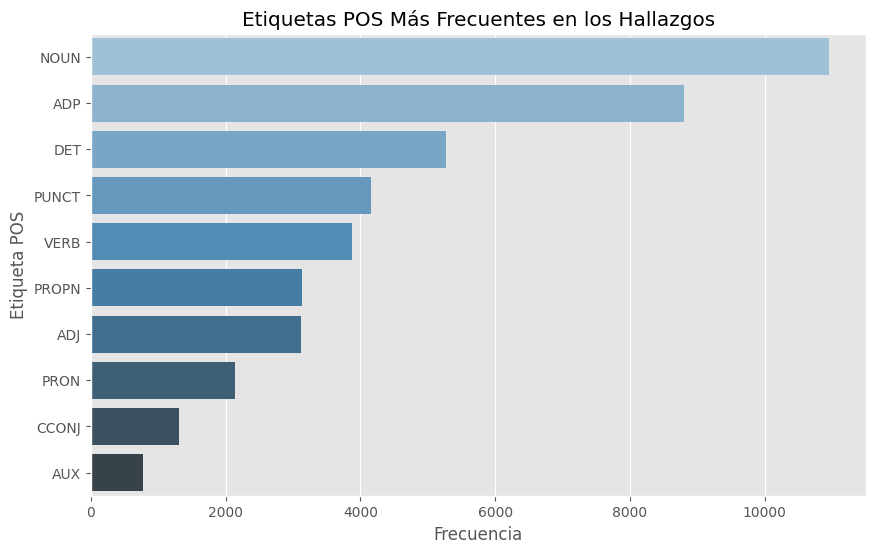

In [19]:
import spacy

# Cargamos el modelo en español de spaCy
nlp = spacy.load('es_core_news_md')

# Definimos una función para extraer las partes del discurso (POS) de cada texto
def analizar_pos(texto):
    doc = nlp(texto)  # Procesamos el texto con spaCy
    pos_tags = [(token.text, token.pos_) for token in doc]  # Obtenemos las etiquetas POS
    return pos_tags

# Aplicamos la función POS a cada texto concatenado limpio
datos_relevantes['POS'] = datos_relevantes['Texto_Concatenado'].apply(lambda x: analizar_pos(x))

# Mostramos las primeras filas del dataset con la columna POS
print("Ejemplo de Análisis POS:")
print(datos_relevantes[['Texto_Concatenado', 'POS']].head())

# ======== ANÁLISIS DE FRECUENCIA DE ETIQUETAS POS ========

# Extraemos todas las etiquetas POS del dataset
etiquetas_pos = [etiqueta for lista in datos_relevantes['POS'] for _, etiqueta in lista]

# Contamos las etiquetas más frecuentes
conteo_pos = Counter(etiquetas_pos).most_common(10)

# Convertimos el conteo a un DataFrame para graficar
df_pos = pd.DataFrame(conteo_pos, columns=['Etiqueta', 'Frecuencia'])

# Visualizamos las etiquetas POS más frecuentes
plt.figure(figsize=(10, 6))
sns.barplot(data=df_pos, x='Frecuencia', y='Etiqueta', palette='Blues_d')
plt.title("Etiquetas POS Más Frecuentes en los Hallazgos")
plt.xlabel("Frecuencia")
plt.ylabel("Etiqueta POS")
plt.show()


Posibles Implicaciones:
Sustantivos y Verbos como Foco Principal:
El enfoque en nombres y acciones es coherente con un proyecto que busca evaluar y gestionar riesgos, describiendo qué se encuentra y qué se recomienda hacer.

Relaciones Claras entre Conceptos:
La alta presencia de preposiciones y determinantes confirma que los textos están orientados a establecer relaciones claras y específicas entre los elementos de los hallazgos.

**Análisis de la Distribución de Longitud de Palabras**

**Distribución de la Frecuencia de Palabras Únicas**

**Análisis de N-gramas**

**Análisis de la Diversidad Léxica**

**Visualización de Palabras con Word Cloud**

**Conclusiones del Analisis exploratorio**

# **Preprocesamiento del Texto**

*Tokenización:*

Tokenizar el texto en palabras, frases o párrafos según sea necesario.

*Limpieza del Texto:*

Convertir a minusculas, eliminar caracteres no deseados, stopwords, lematización, y stemming.

*Análisis Léxico y Morfológico:*

Identificación de partes del discurso (POS tagging) y análisis morfológico.

**Análisis Sintáctico**

*Parsing:*

Construir árboles sintácticos para las oraciones en el corpus.

*Dependencia Sintáctica:*

Análisis de dependencias para entender las relaciones gramaticales entre palabras.

**Análisis Semántico**

*Coreferencia:*

Resolver las referencias cruzadas en el texto para entender a qué se refieren los pronombres y otras expresiones.

*Análisis de Coherencia:*

Evaluar la coherencia y cohesión del discurso.

**Análisis Pragmático**

*Análisis de Sentimientos:*

Determinar el tono y las emociones expresadas en el texto.

*Detección de Intenciones:*

Identificar las intenciones detrás de las expresiones del texto.

**Codificación de texto a vectores**

Bag of word

Tf-IDF

Word Embendings


#**Feature Selection**

**Selección de variable objetivo y variables independientes**

**Clasificación de Texto**

X (Entrada): Texto del documento (puede ser una oración, párrafo, o artículo completo).

Y (Salida): Etiqueta de la categoría del texto (por ejemplo, "positivo" o "negativo" para análisis de sentimientos, o categorías como "deportes", "política", "tecnología" para clasificación de noticias).

**Análisis de Sentimientos**

X (Entrada): Texto del documento.

Y (Salida): Sentimiento asociado (por ejemplo, "positivo", "negativo" o "neutral").

**Reconocimiento de Entidades Nombradas (NER)**

X (Entrada): Texto del documento.

Y (Salida): Entidades reconocidas y sus categorías (por ejemplo, "PERSONA", "ORGANIZACIÓN", "LUGAR").

**Traducción Automática**

X (Entrada): Texto en el idioma de origen.

Y (Salida): Texto traducido al idioma de destino.

**Resumen de Texto**

X (Entrada): Texto completo del documento.

Y (Salida): Resumen del documento.

**Generación de Texto**

X (Entrada): Prompt o inicio de una frase o párrafo.

Y (Salida): Texto generado continuando el prompt.

**Modelos de Lenguaje (Language Modeling)**

X (Entrada): Una secuencia de palabras o caracteres.

Y (Salida): La siguiente palabra o carácter en la secuencia.

# **Modelos**

**Librerias necesarias para implementar los modelos**

**División de datos en conjuntos de entrenamiento y prueba**

**Predicción con conjunto de prueba**

**Evaluación del rendimiento del modelo**

**Conclusión sobre el modelado y las metricas**

#**Optimización de modelos**

**Conclusión sobre la optimización**

# **Conclusiones Finales**